In [1]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget
cmap = matplotlib.colormaps.get('tab10').colors

In [6]:
def get_lattice_vectors(scale, binding_angle, initial_length=1):
    '''
    Function that returns the lattice vectors of a 2D lattice. It takes the following arguments:
    - scale: The scale of the lattice vectors (e.g. 2 means one lattice vector is twice as long as the initial_length)
    - binding_angle: The angle between two connections (e.g. 120 degrees for a hexagonal lattice)
    - initial_length: The length of the x lattice vector
    '''
    e1 = np.array([initial_length,0])
    e2 = np.array([initial_length*np.sin(np.radians(binding_angle-90)),initial_length*np.cos(np.radians(binding_angle-90))])
    e2 = e2*scale
    return e1, e2

def get_nodes(e1, e2, size=[10,10]):
    '''
    Function that returns the array of nodes in the 2D lattice. It takes the following arguments:
    - e1: The first lattice vector
    - e2: The second lattice vector
    - size: The size of the lattice in nodes
    '''
    nodes = []
    for i in range(size[0]):
        for j in range(size[1]):
            node = j*e1+i*e2
            nodes.append([node[0], node[1]])
    nodes = np.array(nodes)
    return nodes

def add_noise(nodes, noise_level=0.1):
    '''
    Function that adds noise to the nodes of a lattice. It takes the following arguments:
    - nodes: The array of nodes
    - noise_level: The standard deviation of the noise
    '''
    noise = rng.normal(0, noise_level, nodes.shape)
    return nodes + noise

def get_connections(nodes, size):
    max_index = len(nodes)
    edges = []
    for i, node in enumerate(nodes):
        if i+1 < max_index and (i+1)%size[1] != 0:
            edges.append([i, i+1])
        if i+size[1] < max_index:
            edges.append([i, i+size[1]])
    return np.array(edges)

def get_hex_connections(nodes, size):
    # Start by fully connecting the nodes
    max_index = len(nodes)
    edges = []
    for i, node in enumerate(nodes):
        if (i+1)%size[1] != 0:
            # There is a node to the right
            edges.append([i, i+1])
        if i+size[1] < max_index:
            # There is a node above
            edges.append([i, i+size[1]])
        if i%size[1] != 0 and i+size[1]-1 < max_index:
            # There is a node to the upper left
            edges.append([i, i+size[1]-1])
    return np.array(edges)
        
# def hexagon_correction(nodes, connections, size):
#     removed_node_indices = []
#     skip_index = -1
#     for i in range(size[0]):
#         # Go through the rows
#         skip_index +=1
#         for j in range(size[1]):
#             # Go through the nodes in the row and remove every third, starting from a different index
#             if (j-skip_index)%3 == 0:
#                 removed_node_indices.append(i*size[1]+j)    
#     nodes = np.delete(nodes, removed_node_indices, axis=0)
#     connections = [edge for edge in connections if edge[0] not in removed_node_indices and edge[1] not in removed_node_indices]
#     connections = np.array(connections)
#     print(removed_node_indices)
#     for i in removed_node_indices:
#         connections[i-1:] -= 1
        
#     return nodes, connections
    
def plot_graph(nodes, connections):
    fig,ax = plt.subplots()
    ax.plot(nodes[:,0], nodes[:,1], 'ro')
    for edge in connections:
        ax.plot([nodes[edge[0]][0], nodes[edge[1]][0]], [nodes[edge[0]][1], nodes[edge[1]][1]], 'g-')
    ax.set_aspect('equal')

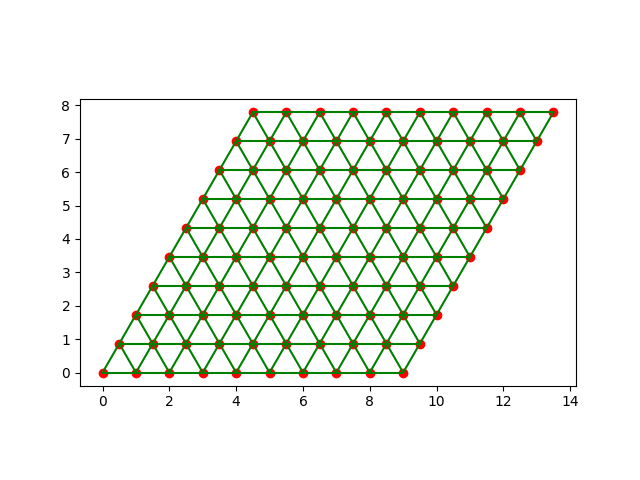

In [9]:
size = [10,10]
e1, e2 = get_lattice_vectors(1, 120, 1)
nodes = get_nodes(e1,e2, size)
#nodes = add_noise(nodes)
connections = get_hex_connections(nodes, size)
plot_graph(nodes, connections)


array([[ 0,  1],
       [ 0, 10],
       [ 1,  2],
       [ 1, 11],
       [ 1, 10],
       [ 2,  3],
       [ 2, 12],
       [ 2, 11],
       [ 3,  4],
       [ 3, 13],
       [ 3, 12],
       [ 4,  5],
       [ 4, 14],
       [ 4, 13],
       [ 5,  6],
       [ 5, 15],
       [ 5, 14],
       [ 6,  7],
       [ 6, 16],
       [ 6, 15],
       [ 7,  8],
       [ 7, 17],
       [ 7, 16],
       [ 8,  9],
       [ 8, 18],
       [ 8, 17],
       [ 9, 19],
       [ 9, 18],
       [10, 11],
       [10, 20],
       [11, 12],
       [11, 21],
       [11, 20],
       [12, 13],
       [12, 22],
       [12, 21],
       [13, 14],
       [13, 23],
       [13, 22],
       [14, 15],
       [14, 24],
       [14, 23],
       [15, 16],
       [15, 25],
       [15, 24],
       [16, 17],
       [16, 26],
       [16, 25],
       [17, 18],
       [17, 27],
       [17, 26],
       [18, 19],
       [18, 28],
       [18, 27],
       [19, 29],
       [19, 28],
       [20, 21],
       [20, 30],
       [21, 22